## Lack of Robustness of the Markowitz Procedure, and the GMV

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
l = ["Food", "Steel"]
erk.msr(0.1, er[l], cov.loc[l,l]) #It depends on the expected returns

array([0.75040363, 0.24959637])

In [10]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [13]:
erk.msr(0.1, np.array([0.10, 0.13]),cov.loc[l,l])

array([0., 1.])

So even a small change in expected returns would change significantly the portfolio. This is a huge problem. The resulting portfolios are affected

This is called the "error maximizing error in Markowitz optimization"

In [14]:
erk.msr(0.1, np.array([0.12, 0.10]),cov.loc[l,l])

array([1., 0.])

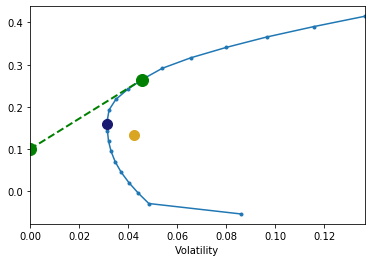

In [18]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)